In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
from collections import defaultdict

# Add the 'scripts' directory to the Python path
scripts_path = os.path.abspath(os.path.join('..'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from data_preprocessing.processing_io import highway_mapping

In [ ]:
dataset_path = '../../data/train_data/sim_output_1pm_22_10_2024/'

try:
    datalist = []
    batch_num = 1
    while True:
        print(f"Processing batch number: {batch_num}")
        # total_memory, available_memory, used_memory = get_memory_info()
        # print(f"Total Memory: {total_memory:.2f} GB")
        # print(f"Available Memory: {available_memory:.2f} GB")
        # print(f"Used Memory: {used_memory:.2f} GB")
        batch_file = os.path.join(dataset_path, f'datalist_batch_{batch_num}.pt')
        if not os.path.exists(batch_file):
            break
        batch_data = torch.load(batch_file, map_location='cpu')
        if isinstance(batch_data, list):
            datalist.extend(batch_data)
        batch_num += 1
    print(f"Loaded {len(datalist)} items into datalist")

except Exception as e:
    print(f"An error occurred: {str(e)}")

In [3]:
# Get highway data from a random sample
x_highway = datalist[49].x[:,5].numpy()

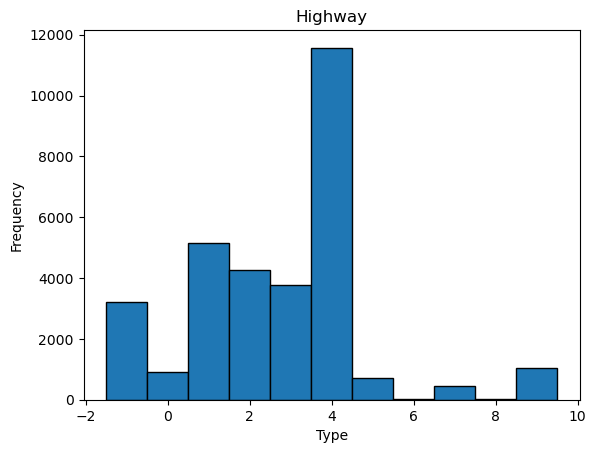

In [4]:
plt.hist(x_highway, bins=range(-1, 11), edgecolor='black', align='left')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Highway')
plt.show()

In [5]:
# Invert the highway_mapping dictionary
inverted_highway_mapping = defaultdict(list)
for key, value in highway_mapping.items():
    inverted_highway_mapping[value].append(key)

# Print the inverted dictionary
for value, keys in inverted_highway_mapping.items():
    print(f"{value}: {keys}")

0: ['trunk', 'trunk_link', 'motorway_link']
1: ['primary', 'primary_link']
2: ['secondary', 'secondary_link']
3: ['tertiary', 'tertiary_link']
4: ['residential']
5: ['living_street']
6: ['pedestrian']
7: ['service']
8: ['construction']
9: ['unclassified']
-1: ['pt']


: 